 # <div align="center"> Logistic Regession and k Nearest Neighbor </div>

### Author & Notes
Skylar Trendley

Data Mining

Homework 5

### Concept Description: </br>
Using the data provided, determine if there is a relationship between missing data and present attributes. Then, using Simple Linear Regression, impute values to fill in the missing data. After the data has been partitioned into an 80/20 split, create two models for Logistic Regression and k Nearest Neighbor to determine which model is superior for the given data set.

### Data Collection: </br>
The data has been provided by Perry B. Koob. It consists of 9 attributes: age, cigarettes pr day, total cholesterol, systolic blood pressure, diastolic blood pressure, body mass index, heart rate, gluclose levels, and coronary heart disease indicator. 

### Example Description: </br>
Attribute Information:
1. age: Interval/Ratio value--it is continuous, and each value has meaning. It can be considered ratio as it does have a meaningful 0 value (birth) and can be measured precisely. 
2. cigsPerDay: Interval/Ratio value--it is continuous, and each value has meaning. It can be considered ratio as it does have a meaningful 0 value (didn't smoke that day) and can be measured precisely (can have half a cigarette)
3. totChol: Interval value--it is continuous, and each value has meaning. It can NOT be considered ratio as it is not possible to have a 0 cholesterol value.
4. sysBP: Interval value--it is continuous, and each value has meaning. It can NOT be considered ratio as it is not possible to have a 0 systolic blood pressure level (which would mean the person has no blood flow).
5. diaBP: Interval value--it is continuous, and each value has meaning. It can NOT be considered ratio as it is not possible to have a 0 diastolic blood pressure level (which would mean the person has no blood flow).
6. BMI: Interval value--it is continuous, and each value has meaning. It can NOT be considered ratio as it is not possible to have a 0 body mass index (they would be weightless)
7. heartRate: Interval value--it is continuous, and each value has meaning. It can NOT be considered ratio as it is not possible to have a 0 heart rate level (they would have no heartbeat).
8. glucose: Interval value--it is continuous, and each value has meaning. It can NOT be considered ratio as it is not possible to have a 0 gluvose level (they would have no blood sugar).
9. CHD: nominal value--it cannot be ordered and mathematical operations cannot be performed on it. It purely defines whether it fits in a category or not.

### Data Import and Wrangling:

In [108]:
#import the data
data <-read.csv(file ='../src-data/heart-disease.csv',stringsAsFactors=TRUE)


From this, we can see the most correlated attributes are indicated with a ',' meaning 0.6 correlation rate, are diastolic blood pressure and systolic blood pressure.

### Exploratory Data Analysis

In [109]:
#determine where the data iscorrelated
#symnum(cor(data, use = "complete.obs"))

cor(data, use="complete.obs")

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
age,1.0000000,-0.19177122,0.26340482,0.39052126,0.20435608,0.13606507,-0.00685930,0.11901330,0.23313774
cigsPerDay,-0.1917712,1.00000000,-0.03102580,-0.09477082,-0.05906913,-0.09247816,0.06868995,-0.05776918,0.05486928
totChol,0.2634048,-0.03102580,1.00000000,0.21595450,0.16877720,0.11411565,0.09413350,0.04654602,0.09553786
sysBP,0.3905213,-0.09477082,0.21595450,1.00000000,0.78515552,0.32780562,0.18257103,0.13303965,0.22011058
diaBP,0.2043561,-0.05906913,0.16877720,0.78515552,1.00000000,0.38078153,0.17734209,0.06030485,0.14666742
BMI,0.1360651,-0.09247816,0.11411565,0.32780562,0.38078153,1.00000000,0.07167668,0.08881617,0.08160282
heartRate,-0.0068593,0.06868995,0.09413350,0.18257103,0.17734209,0.07167668,1.00000000,0.09717943,0.02135059
glucose,0.1190133,-0.05776918,0.04654602,0.13303965,0.06030485,0.08881617,0.09717943,1.00000000,0.12526938
CHD,0.2331377,0.05486928,0.09553786,0.22011058,0.14666742,0.08160282,0.02135059,0.12526938,1.00000000


In this data set, we can see the best predictors are as follows:

Format(Attribute A -> B) (Attribute A is BEST predicted by B)

Age -> SysBP               :  0.39052126

cigsPerDay -> Age          : -0.1917712

totChol -> Age             :  0.2634048

sysBP -> diaBP             :  0.78515552

diaBP -> sysBP             :  0.78515552

BMI -> diaBP               :  0.38078153

heartRate -> sysBP         :  0.18257103

glucose -> sysBP           :  0.13303965


In [110]:
#step through the column and if it has a value --> 1; else --> 0
Ind <- function(t)
{
    x <- dim(length(t))
    x[which(!is.na(t))] = 1
    x[which(is.na(t))] = 0
    return(x)
}

#for every attribute that has NA data, create a new column and show where the values are missing
data$IndCigs <- Ind(data$cigsPerDay)
data$IndChol <- Ind(data$totChol)
data$IndBMI <- Ind(data$BMI)
data$IndHR <- Ind(data$heartRate)
data$IndGlucose <- Ind(data$glucose)

In [111]:
#show the linear model to find the intercept and the slope
lm(cigsPerDay ~ age, data=data)
summary(lm(cigsPerDay ~ age, data))


Call:
lm(formula = cigsPerDay ~ age, data = data)

Coefficients:
(Intercept)          age  
    22.2803      -0.2678  



Call:
lm(formula = cigsPerDay ~ age, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.444  -8.625  -5.412   8.698  58.430 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.28029    1.05735   21.07   <2e-16 ***
age         -0.26776    0.02101  -12.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.7 on 4207 degrees of freedom
  (29 observations deleted due to missingness)
Multiple R-squared:  0.03717,	Adjusted R-squared:  0.03694 
F-statistic: 162.4 on 1 and 4207 DF,  p-value: < 2.2e-16


In [112]:
#fill in the missing values
for(i in 1:nrow(data))
{
  if(data$IndCigs[i] == 0)
    {
        data$cigsPerDay[i] = 22.2803 + (-0.2678)*data$age[i]
    }
    
    
}

In [113]:
#show the linear model to find the intercept and the slope
lm(totChol ~ age, data=data)
summary(lm(totChol ~ age, data))


Call:
lm(formula = totChol ~ age, data = data)

Coefficients:
(Intercept)          age  
    169.061        1.365  



Call:
lm(formula = totChol ~ age, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-157.62  -29.05   -3.22   24.80  457.32 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 169.06090    3.90701   43.27   <2e-16 ***
age           1.36516    0.07768   17.57   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.04 on 4186 degrees of freedom
  (50 observations deleted due to missingness)
Multiple R-squared:  0.06871,	Adjusted R-squared:  0.06849 
F-statistic: 308.9 on 1 and 4186 DF,  p-value: < 2.2e-16


In [114]:
#fill in the missing values
for(i in 1:nrow(data))
{
  if(data$IndChol[i] == 0)
    {
        data$totChol[i] = 169.061 + 1.365*data$age[i]
    }
    
}

In [115]:
#show the linear model to find the intercept and the slope
lm(BMI ~ diaBP, data=data)
summary(lm(BMI ~ diaBP, data))


Call:
lm(formula = BMI ~ diaBP, data = data)

Coefficients:
(Intercept)        diaBP  
    15.0733       0.1294  



Call:
lm(formula = BMI ~ diaBP, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5721  -2.4550  -0.2838   2.0562  24.9032 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.073276   0.409316   36.83   <2e-16 ***
diaBP        0.129411   0.004887   26.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.779 on 4217 degrees of freedom
  (19 observations deleted due to missingness)
Multiple R-squared:  0.1426,	Adjusted R-squared:  0.1424 
F-statistic: 701.2 on 1 and 4217 DF,  p-value: < 2.2e-16


In [116]:
#fill in the missing values
for(i in 1:nrow(data))
{
  if(data$IndBMI[i] == 0)
    {
        data$BMI[i] = 15.0733 + 0.1294*data$diaBP[i]
    }
    
}

In [117]:
#show the linear model to find the intercept and the slope
lm(heartRate ~ sysBP, data=data)
summary(lm(heartRate ~ sysBP, data))


Call:
lm(formula = heartRate ~ sysBP, data = data)

Coefficients:
(Intercept)        sysBP  
   62.71318      0.09948  



Call:
lm(formula = heartRate ~ sysBP, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.850  -8.148  -1.018   6.608  67.056 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 62.713177   1.106526   56.68   <2e-16 ***
sysBP        0.099482   0.008248   12.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.83 on 4235 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.03321,	Adjusted R-squared:  0.03299 
F-statistic: 145.5 on 1 and 4235 DF,  p-value: < 2.2e-16


In [118]:
#fill in the missing values
for(i in 1:nrow(data))
{
  if(data$IndHR[i] == 0)
    {
        data$heartRate[i] = 62.71318 + 0.09948*data$sysBP[i]
    }
    
}

In [119]:
#show the linear model to find the intercept and the slope
lm(glucose ~ sysBP, data=data)
summary(lm(glucose ~ sysBP, data))


Call:
lm(formula = glucose ~ sysBP, data = data)

Coefficients:
(Intercept)        sysBP  
    61.8044       0.1522  



Call:
lm(formula = glucose ~ sysBP, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-49.81 -10.73  -3.59   5.00 316.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 61.80443    2.32014  26.638   <2e-16 ***
sysBP        0.15223    0.01728   8.811   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.73 on 3848 degrees of freedom
  (388 observations deleted due to missingness)
Multiple R-squared:  0.01977,	Adjusted R-squared:  0.01952 
F-statistic: 77.63 on 1 and 3848 DF,  p-value: < 2.2e-16


In [120]:
#fill in the missing values
for(i in 1:nrow(data))
{
  if(data$IndGlucose[i] == 0)
    {
        data$glucose[i] = 61.8044 + 0.1522*data$sysBP[i]
    }
    
}

In [121]:
#drop the unwanted attributes now that they are no longer useful
data$IndCigs <- NULL
data$IndChol <- NULL
data$IndBMI <- NULL
data$IndHR <- NULL
data$IndGlucose <- NULL

write.csv(data,"../src-data/imputed-data.csv")

In [122]:
#partition the data into an 80/20 split

#set the sample size to be 80% of the data
smp_size <- floor(0.80 * nrow(data))

#set the seed so that the data is randomized but reproducable
set.seed(123)

#partition the data into an indici
train_ind <- sample(seq_len(nrow(data)), size=smp_size)

#pour 80% of the data into train, 20% into test
train <- data[train_ind, ]
test <- data[-train_ind, ]

#used later for k nearest neighbor
train_c <- data[train_ind, 1]
test_c <- data[-train_ind, 1]


### Mining or Analytics

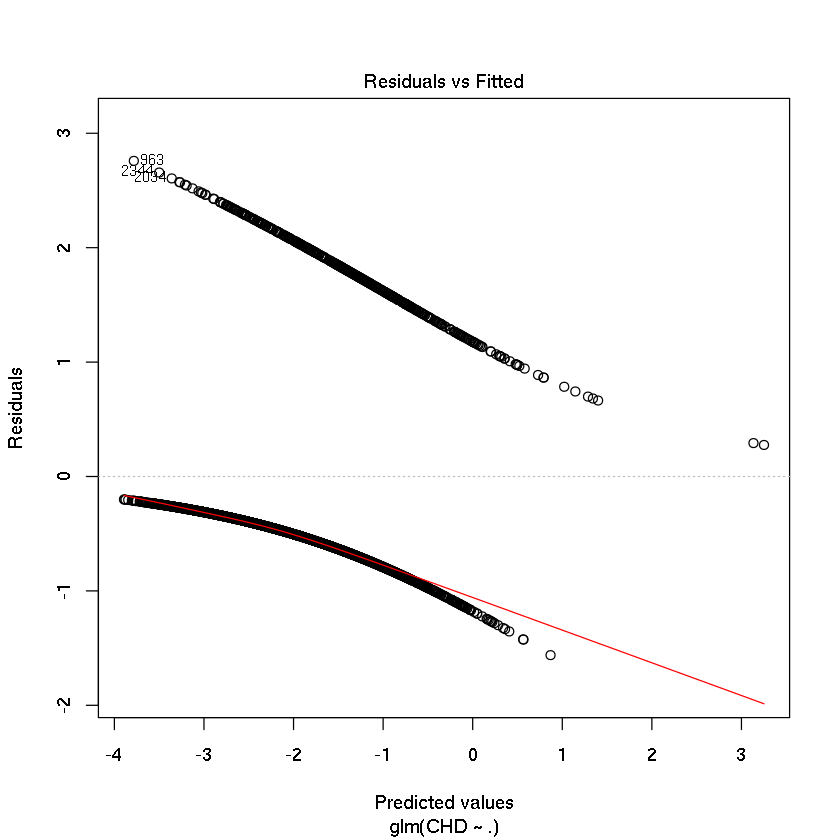

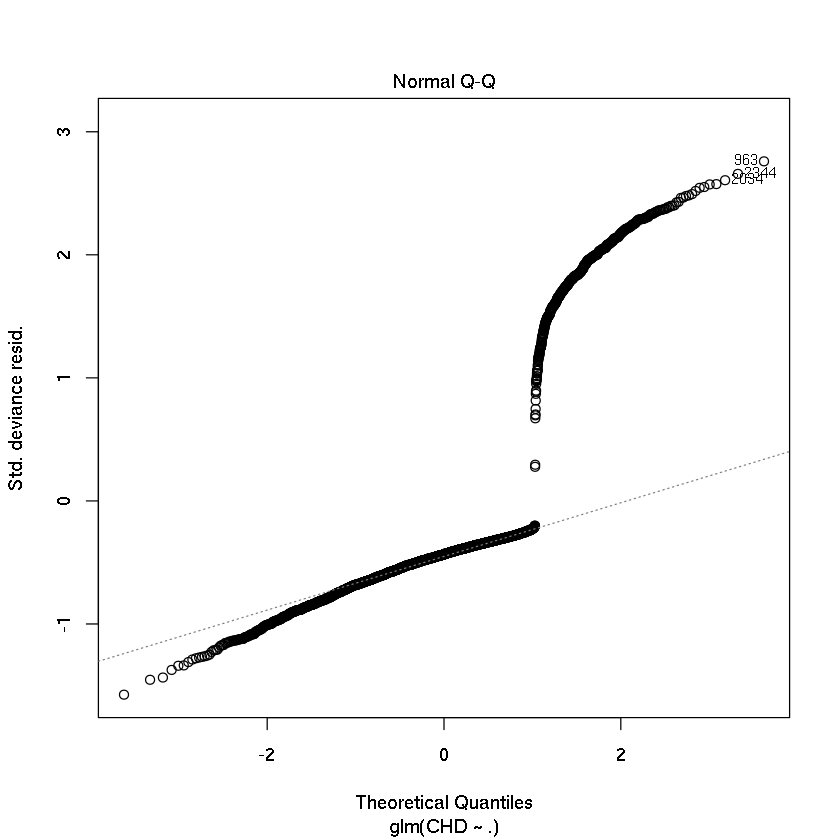

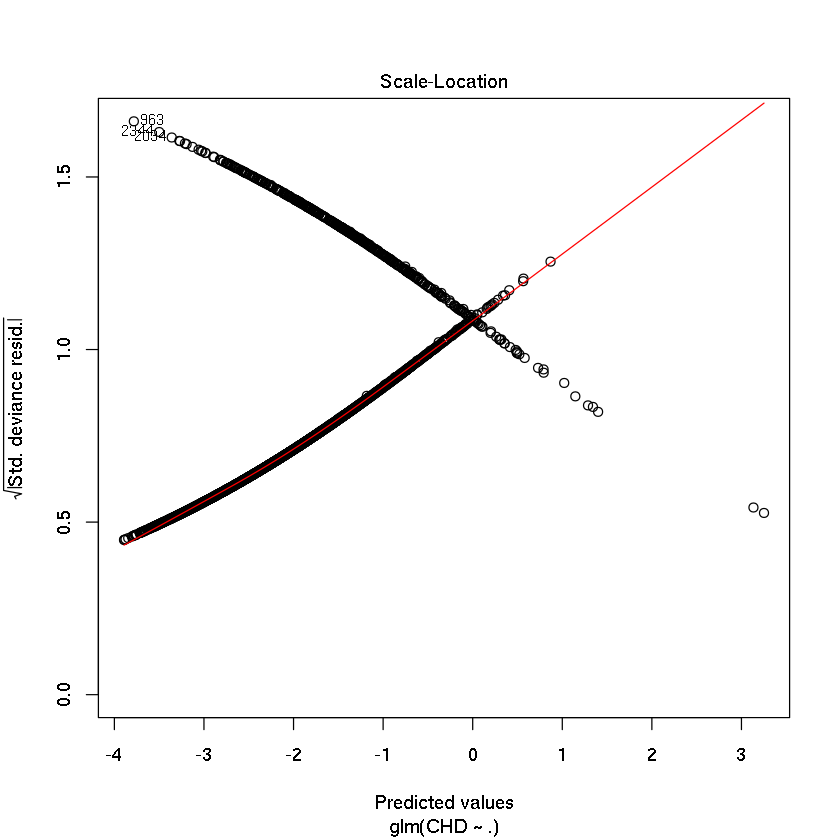

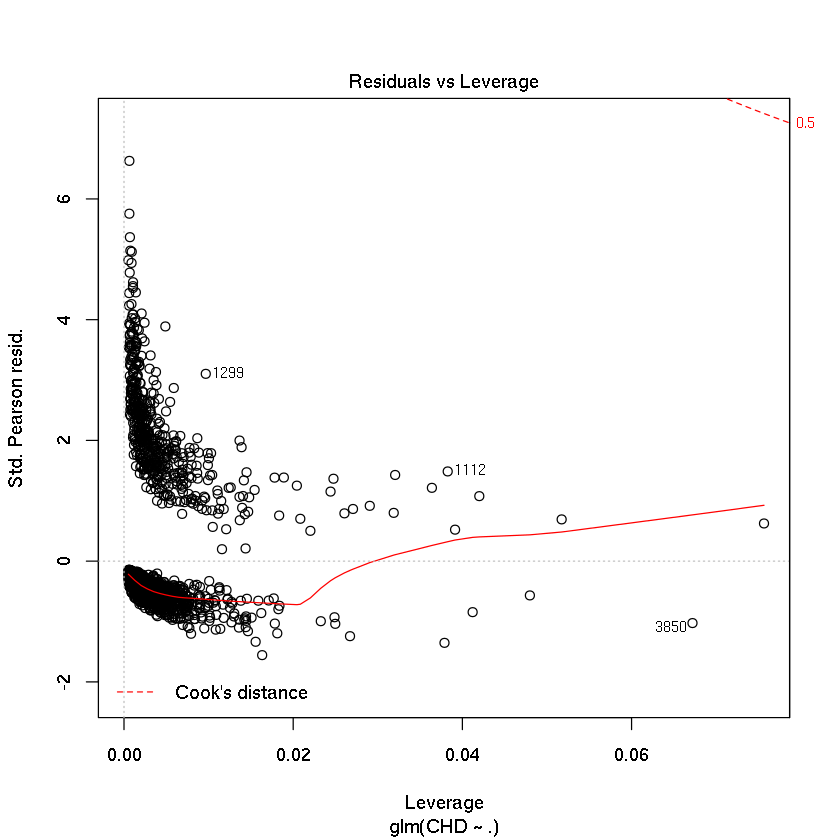

In [123]:
#Logistic Regression

model <- glm(CHD ~ ., data=train, family="binomial")

plot(model)

predict <- predict(model, type='response')

In [124]:
# k nearest neighbor
library(class)

obs <- NROW(train_c)   # to find the number of observation
cat("Number of observations:",obs)

Number of observations: 3390

In [125]:
#To identify optimum value of k, generally square root of total no of observations is taken.
k_acc <- sqrt(obs)
cat("Sqrt of obs:",k_acc)

Sqrt of obs: 58.22371

In [126]:
#Try values of 58 and 59, then check for optimal value of k

knn.58 <-  knn(train=train, test=test, cl=train_c, k=58)
knn.59 <-  knn(train=train, test=test, cl=train_c, k=59)
knn.65 <-  knn(train=train, test=test, cl=train_c, k=65) #sqrt of whole dataset

ACC.58 <- 100 * sum(test_c == knn.58)/NROW(test_c)  # For knn = 58
ACC.59 <- 100 * sum(test_c == knn.59)/NROW(test_c)  # For knn = 59
ACC.65 <- 100 * sum(test_c == knn.65)/NROW(test_c)  # For knn = 59


cat("Accuracy of 58:",ACC.58,"\n")
cat("Accuracy of 59:",ACC.59,"\n")
cat("Accuracy of 65:",ACC.65,"\n")

Accuracy of 58: 7.54717 
Accuracy of 59: 8.018868 
Accuracy of 65: 7.900943 


In [127]:
#As a test, loop through values 1:100 to see if we can find a more accurate k value
i=1                          # declaration to initiate for loop
k.optm=1                     # declaration to initiate for loop
for (i in 1:100){ 
    knn.mod <-  knn(train=train, test=test, cl=train_c, k=i)
    k.optm[i] <- 100 * sum(test_c == knn.mod)/NROW(test_c)
    k=i  
    cat(k,'=',k.optm[i],'\n')       # to print % accuracy 
}

1 = 8.254717 
2 = 8.962264 
3 = 8.608491 
4 = 9.198113 
5 = 8.490566 
6 = 8.254717 
7 = 9.316038 
8 = 8.962264 
9 = 8.136792 
10 = 8.136792 
11 = 8.490566 
12 = 8.608491 
13 = 7.429245 
14 = 8.372642 
15 = 7.429245 
16 = 6.957547 
17 = 8.254717 
18 = 7.075472 
19 = 6.721698 
20 = 6.603774 
21 = 7.783019 
22 = 6.721698 
23 = 6.25 
24 = 5.896226 
25 = 6.132075 
26 = 6.721698 
27 = 5.896226 
28 = 6.603774 
29 = 6.957547 
30 = 7.193396 
31 = 7.075472 
32 = 6.957547 
33 = 7.54717 
34 = 7.311321 
35 = 7.429245 
36 = 7.429245 
37 = 7.54717 
38 = 7.193396 
39 = 7.665094 
40 = 8.372642 
41 = 8.372642 
42 = 7.665094 
43 = 8.136792 
44 = 8.018868 
45 = 7.665094 
46 = 7.311321 
47 = 7.311321 
48 = 8.136792 
49 = 7.193396 
50 = 6.721698 
51 = 7.900943 
52 = 7.311321 
53 = 7.075472 
54 = 7.311321 
55 = 6.721698 
56 = 7.54717 
57 = 7.429245 
58 = 7.54717 
59 = 7.54717 
60 = 6.957547 
61 = 7.783019 
62 = 7.54717 
63 = 8.84434 
64 = 8.254717 
65 = 7.783019 
66 = 7.311321 
67 = 8.018868 
68 = 6.839623 


In [128]:
library(caret)
pred <- train(train, train_c, method = "knn", preProcess = c("center","scale"))

pred

k-Nearest Neighbors 

3390 samples
   9 predictor

Pre-processing: centered (9), scaled (9) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3390, 3390, 3390, 3390, 3390, 3390, ... 
Resampling results across tuning parameters:

  k  RMSE      Rsquared   MAE     
  5  2.751231  0.9004584  2.081043
  7  2.618654  0.9130274  1.979063
  9  2.568349  0.9189556  1.935741

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 9.

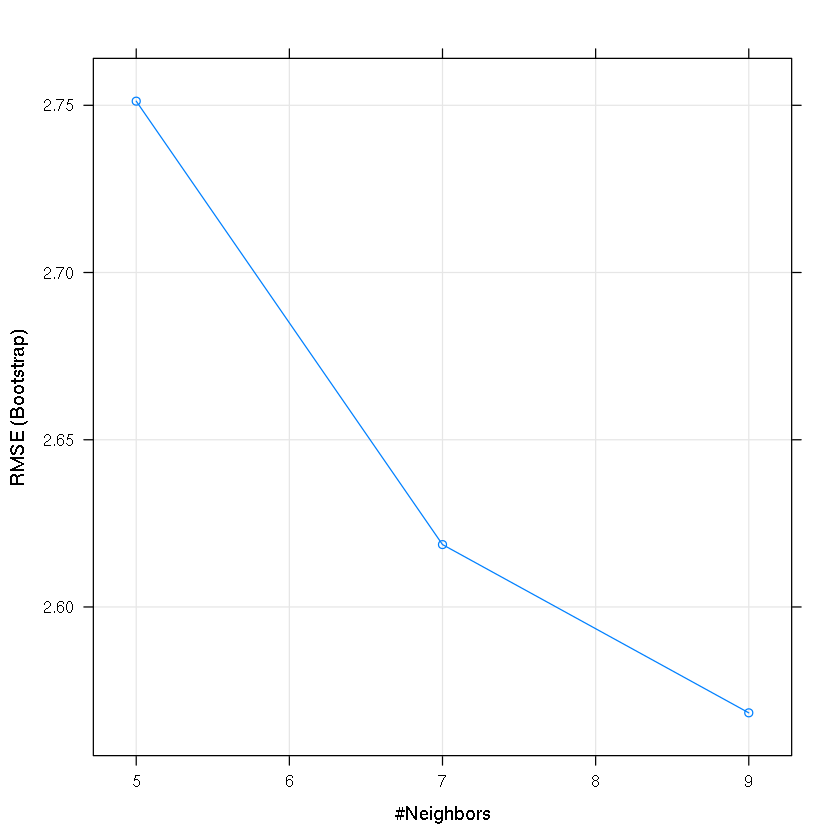

In [129]:
plot(pred)

In [130]:
knnPredict <- predict(pred, newdata = test) 

### Evaluation

In [131]:
#Linear Regression Evaluation

table <- table(train$CHD, predict > 0.5)

print('Confusion Matrix:')
table

[1] "Confusion Matrix:"


   
    FALSE TRUE
  0  2858   18
  1   477   37

In [132]:
#Linear Regression Evaluation

overallAccuracy <- sum(diag(table))/sum(table) #overall accuracy
incorrectClassification <- 1-sum(diag(table))/sum(table) #incorrect classification 
correctClassified <- sum(diag(table)) #N cases correctly classified
incorrectClassified <- sum(table)-sum(diag(table)) #N cases incorrectly classified
totClassified <- sum(correctClassified+incorrectClassified)
errorRate <- sum(incorrectClassified/totClassified)

In [133]:
#Linear Regression Evaluation

cat("Overall Accuracy:", overallAccuracy,"\n")
cat("Incorrect Classifications:", incorrectClassification,"\n")
cat("Correctly Classified Cases:",correctClassified,"\n")
cat("Incorrectly Classified Cases:", incorrectClassified,"\n")
cat("Error Rate:",errorRate,"\n")

Overall Accuracy: 0.8539823 
Incorrect Classifications: 0.1460177 
Correctly Classified Cases: 2895 
Incorrectly Classified Cases: 495 
Error Rate: 0.1460177 


In [134]:
# k Nearest Neighbor Evaluation

ktable <- table(test$CHD, knnPredict > 0.5)

print("Confusion Matrix:")
ktable

[1] "Confusion Matrix:"


   
    TRUE
  0  718
  1  130

In [135]:
# k Nearest Neighbor Evaluation

KoverallAccuracy <- sum(diag(ktable))/sum(ktable) #overall accuracy
KincorrectClassification <- 1-sum(diag(ktable))/sum(ktable) #incorrect classification 
KcorrectClassified <- sum(diag(ktable)) #N cases correctly classified
KincorrectClassified <- sum(ktable)-sum(diag(ktable)) #N cases incorrectly classified
KtotClassified <- sum(KcorrectClassified+KincorrectClassified)
KerrorRate <- sum(KincorrectClassified/KtotClassified)

In [136]:
# k Nearest Neighbor Evaluation

cat("Overall Accuracy:", KoverallAccuracy,"\n")
cat("Incorrect Classifications:", KincorrectClassification,"\n")
cat("Correctly Classified Cases:",KcorrectClassified,"\n")
cat("Incorrectly Classified Cases:", KincorrectClassified,"\n")
cat("Error Rate:",KerrorRate,"\n")

Overall Accuracy: 0.8466981 
Incorrect Classifications: 0.1533019 
Correctly Classified Cases: 718 
Incorrectly Classified Cases: 130 
Error Rate: 0.1533019 


### Results

The confusion matricies showed that the Logistic Regression model had an accuracy rate of 85.39% compared to the k Nearest Neighbor model at 84.66%. While both models are relatively accurate, the Logistic Regression model is more accurate and therefore the model I would choose to present to the customer.

### References

<br> https://stackoverflow.com/questions/53963781/confusion-matrix-on-regression-logistic </br>
<br>https://www.datacamp.com/community/tutorials/confusion-matrix-calculation-r </br>
<br>https://rstudio-pubs-static.s3.amazonaws.com/316172_a857ca788d1441f8be1bcd1e31f0e875.html</br>
<br>https://quantdev.ssri.psu.edu/sites/qdev/files/kNN_tutorial.html</br>